<a href="https://colab.research.google.com/github/LAHYANIOmar/Debruitage/blob/main/Non-local%20means%20denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from copy import copy

In [ ]:
src = cv2.imread('messi.png')

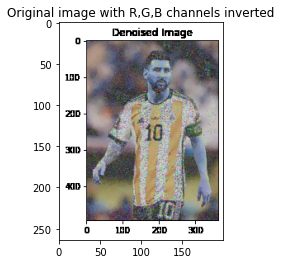

In [ ]:
plt.title('Original image with R,G,B channels inverted')
plt.imshow(src)

Les couleurs sont inversées car la librairie CV2 lit les chaines RGB en inverse c'est à dire BGR

In [ ]:
def noisy(noise_typ,image):
   if noise_typ == "gauss":
      row,col,ch= image.shape
      mean = 0
      var = 1000
      sigma = var**0.5
      gauss = np.random.normal(mean,sigma,(row,col,ch))
      gauss = gauss.reshape(row,col,ch)
      noisy = image + gauss
      return noisy

Ce code ajoute un bruit gaussien en utilisant la distribution gaussienne avec une variance 1000 et une moyenne 0

In [ ]:
messi_bgr_src = copy(src)

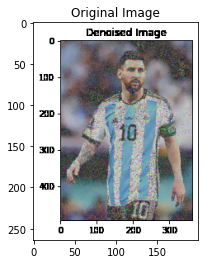

In [ ]:
messi_rgb_src = cv2.cvtColor(messi_bgr_src, cv2.COLOR_BGR2RGB)
plt.title('Original Image')
plt.imshow(messi_rgb_src)

Ceçi est l'image originale


In [ ]:
dst = noisy('gauss',messi_rgb_src)

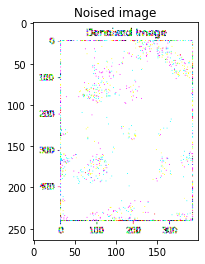

In [ ]:
plt.title('Noised image')
plt.imshow(dst)

On a maintenant l'image avec le bruit gaussien et on va la débruiter

Denoising

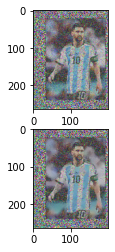

In [ ]:
plt.subplot(211),plt.imshow(dst)
dst=np.uint8(dst)
messi_denoised = cv2.fastNlMeansDenoisingColored(dst,None,10,10,7,15)
b,g,r = cv2.split(horse_denoised)
horse_denoised = cv2.merge([r,g,b])
cv2.imwrite('img1.jpg', messi_denoised)
plt.subplot(212),plt.imshow(messi_denoised)
plt.show()

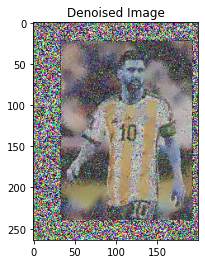

In [ ]:
messi_rgb_final = cv2.cvtColor(messi_denoised, cv2.COLOR_BGR2RGB)
plt.title('Denoised Image')
plt.imshow(messi_rgb_final)